<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Ionosphere_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [42]:
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/ionosphere_data.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [43]:
# Checking For Null Values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

### OUR DATA CONTAINS NO NULL VALUES

In [44]:
# Shuffling Data
df = df.sample(frac = 1)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
65,1,0,0.84783,0.10598,1.00000,0.39130,1.00000,-1.00000,0.66938,0.08424,1.00000,0.27038,1.00000,0.60598,1.00000,0.35507,1.00000,0.02672,0.58424,-0.43025,1.00000,0.63496,0.89130,0.26585,0.91033,-0.33333,1.00000,0.15942,0.37681,-0.01947,1.00000,0.22464,1.00000,0.37409,b
344,1,0,0.76046,0.01092,0.86335,0.00258,0.85821,0.00384,0.79988,0.02304,0.81504,0.12068,0.83096,0.00744,0.81815,0.00854,0.82777,-0.06974,0.76531,0.03881,0.76979,0.01148,0.75071,0.01232,0.77138,-0.00303,0.70886,0.01375,0.66161,0.00849,0.66298,0.01484,0.63887,0.01525,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
57,0,0,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-0.18750,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,b
310,1,0,0.93658,0.35107,0.75254,0.65640,0.45571,0.88576,0.15323,0.95776,-0.21775,0.96301,-0.56535,0.83397,-0.78751,0.58045,-0.93104,0.26020,-0.93641,-0.06418,-0.87028,-0.40949,-0.65079,-0.67464,-0.36799,-0.84951,-0.04578,-0.91221,0.27330,-0.85762,0.54827,-0.69613,0.74828,-0.44173,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1,0,0.92308,0.15451,0.86399,0.29757,0.72582,0.36790,0.70588,0.56830,0.57449,0.62719,0.43270,0.74676,0.31705,0.67697,0.19128,0.76818,0.04686,0.76171,-0.12064,0.76969,-0.18479,0.71327,-0.29291,0.65708,-0.38798,0.58553,-0.46799,0.50131,-0.53146,0.40732,-0.56231,0.35095,g
110,1,0,0.65909,-0.62879,0.00000,0.00000,0.00000,0.00000,0.77273,1.00000,1.00000,-0.28030,0.00000,0.00000,0.00000,0.00000,0.62121,-0.22727,0.84091,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-0.93939,-0.12879,-0.93182,0.00000,0.00000,0.00000,0.00000,b
62,1,0,1.00000,0.16801,0.99352,0.16334,0.94616,0.33347,0.91759,0.22610,0.91408,0.37107,0.84250,0.46899,0.81011,0.49225,0.78473,0.48311,0.65091,0.56977,0.56553,0.58071,0.55586,0.64720,0.48311,0.55236,0.43317,0.69129,0.35684,0.76147,0.33921,0.66844,0.22101,0.78685,g
166,1,0,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.43750,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,b


In [45]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = df.iloc[:211,:]
train_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
65,1,0,0.84783,0.10598,1.00000,0.39130,1.00000,-1.00000,0.66938,0.08424,1.00000,0.27038,1.00000,0.60598,1.00000,0.35507,1.00000,0.02672,0.58424,-0.43025,1.00000,0.63496,0.89130,0.26585,0.91033,-0.33333,1.00000,0.15942,0.37681,-0.01947,1.00000,0.22464,1.00000,0.37409,b
344,1,0,0.76046,0.01092,0.86335,0.00258,0.85821,0.00384,0.79988,0.02304,0.81504,0.12068,0.83096,0.00744,0.81815,0.00854,0.82777,-0.06974,0.76531,0.03881,0.76979,0.01148,0.75071,0.01232,0.77138,-0.00303,0.70886,0.01375,0.66161,0.00849,0.66298,0.01484,0.63887,0.01525,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
57,0,0,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-0.18750,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,b
310,1,0,0.93658,0.35107,0.75254,0.65640,0.45571,0.88576,0.15323,0.95776,-0.21775,0.96301,-0.56535,0.83397,-0.78751,0.58045,-0.93104,0.26020,-0.93641,-0.06418,-0.87028,-0.40949,-0.65079,-0.67464,-0.36799,-0.84951,-0.04578,-0.91221,0.27330,-0.85762,0.54827,-0.69613,0.74828,-0.44173,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,0,0.05866,-0.00838,0.06704,0.00838,0.00000,-0.01117,0.00559,-0.03911,0.01676,-0.07542,-0.00559,0.05307,0.06425,-0.03352,0.00000,0.09497,-0.06425,0.07542,-0.04749,0.02514,0.02793,-0.00559,0.00838,0.00559,0.10335,-0.00838,0.03073,-0.00279,0.04469,0.00000,0.04749,-0.03352,b
68,1,0,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,g
298,1,0,0.88241,0.30634,0.73232,0.57816,0.34109,0.58527,0.05717,1.00000,-0.09238,0.92118,-0.62403,0.71996,-0.69767,0.32558,-0.81422,0.41195,-1.00000,-0.00775,-0.78973,-0.41085,-0.76901,-0.45478,-0.57242,-0.67605,-0.31610,-0.81876,-0.02979,-0.86841,0.25392,-0.82127,0.00194,-0.81686,g
293,1,0,0.87772,-0.08152,0.83424,0.07337,0.84783,0.04076,0.77174,-0.02174,0.77174,-0.05707,0.82337,-0.10598,0.67935,-0.00543,0.88043,-0.20924,0.83424,0.03261,0.86413,-0.05978,0.97283,-0.27989,0.85054,-0.18750,0.83705,-0.10211,0.85870,-0.03261,0.78533,-0.10870,0.79076,-0.00543,g


In [46]:
# Testing Data
test_data = df.iloc[211:,:]
test_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
89,1,0,0.41932,0.12482,0.35000,0.12500,0.23182,0.27955,-0.03636,0.44318,0.04517,0.36194,-0.19091,0.33636,-0.13350,0.27322,0.02727,0.40455,-0.34773,0.12727,-0.20028,0.05078,-0.18636,0.36364,-0.14003,-0.04802,-0.09971,-0.07114,-1.00000,-1.00000,-0.02916,-0.07464,-0.00526,-0.06314,b
272,1,0,0.63510,-0.04388,0.76530,0.02968,0.61432,0.36028,0.65358,-0.00462,0.64203,0.08314,0.79446,-0.43418,0.72517,0.54965,0.59584,0.13857,0.63510,0.21940,0.63279,-0.25404,0.70951,0.15359,0.64665,0.23095,0.68775,0.17704,0.61663,0.07621,0.66316,0.19841,0.69053,0.36721,g
239,1,0,0.61857,0.10850,0.70694,-0.06935,0.70358,0.01678,0.74273,0.00224,0.71029,0.15772,0.71588,-0.00224,0.79754,0.06600,0.83669,-0.16555,0.68680,-0.09060,0.62528,-0.01342,0.60962,0.11745,0.71253,-0.09508,0.69845,-0.01673,0.63311,0.04810,0.78859,-0.05145,0.65213,-0.04698,g
244,1,0,0.00000,0.00000,1.00000,0.12889,0.88444,-0.02000,0.00000,0.00000,1.00000,-0.42444,1.00000,0.19556,1.00000,-0.05333,1.00000,-0.81556,0.00000,0.00000,1.00000,-0.04000,1.00000,-0.18667,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,0.11778,0.90667,-0.09556,b
82,1,0,0.92277,0.07804,0.92679,0.16251,0.89702,0.24618,0.84111,0.35197,0.78801,0.42196,0.70716,0.46983,0.70796,0.56476,0.60459,0.64200,0.51247,0.64924,0.39903,0.66975,0.34232,0.68343,0.23693,0.76146,0.18765,0.73885,0.09694,0.71038,0.02735,0.77072,-0.04023,0.69509,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1,0,0.92308,0.15451,0.86399,0.29757,0.72582,0.36790,0.70588,0.56830,0.57449,0.62719,0.43270,0.74676,0.31705,0.67697,0.19128,0.76818,0.04686,0.76171,-0.12064,0.76969,-0.18479,0.71327,-0.29291,0.65708,-0.38798,0.58553,-0.46799,0.50131,-0.53146,0.40732,-0.56231,0.35095,g
110,1,0,0.65909,-0.62879,0.00000,0.00000,0.00000,0.00000,0.77273,1.00000,1.00000,-0.28030,0.00000,0.00000,0.00000,0.00000,0.62121,-0.22727,0.84091,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-0.93939,-0.12879,-0.93182,0.00000,0.00000,0.00000,0.00000,b
62,1,0,1.00000,0.16801,0.99352,0.16334,0.94616,0.33347,0.91759,0.22610,0.91408,0.37107,0.84250,0.46899,0.81011,0.49225,0.78473,0.48311,0.65091,0.56977,0.56553,0.58071,0.55586,0.64720,0.48311,0.55236,0.43317,0.69129,0.35684,0.76147,0.33921,0.66844,0.22101,0.78685,g
166,1,0,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.43750,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,b


In [47]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

65     b
344    g
349    g
57     b
310    g
      ..
152    b
68     g
298    g
293    g
246    b
Name: label, Length: 211, dtype: object

In [48]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

89     b
272    g
239    g
244    b
82     g
      ..
225    g
110    b
62     g
166    b
333    g
Name: label, Length: 140, dtype: object

In [49]:
# Standardizing Training And Testing Data

train_data = scale(train_data)
train_data

array([[ 0.38306544,  0.        ,  0.39938417, ...,  0.43084206,
         1.24550362,  0.77759789],
       [ 0.38306544,  0.        ,  0.22753632, ...,  0.01651845,
         0.56174718,  0.02685981],
       [ 0.38306544,  0.        ,  0.51395596, ..., -0.08698345,
         1.0069945 , -0.34486893],
       ...,
       [ 0.38306544,  0.        ,  0.46739949, ..., -1.63467368,
        -0.64420354, -1.71401819],
       [ 0.38306544,  0.        ,  0.45817474, ..., -0.22745456,
         0.84933272, -0.01640533],
       [ 0.38306544,  0.        , -1.2682107 , ..., -0.01278833,
        -0.6478767 , -0.00504509]])

In [50]:
test_data = scale(test_data)
test_data

array([[ 2.92012530e-01,  0.00000000e+00, -4.52482150e-01, ...,
        -1.06056879e-01, -7.13514819e-01, -2.12403735e-01],
       [ 2.92012530e-01,  0.00000000e+00, -2.22095984e-03, ...,
         4.16959711e-01,  6.44962947e-01,  7.41657727e-01],
       [ 2.92012530e-01,  0.00000000e+00, -3.67135795e-02, ...,
        -6.16373417e-02,  5.69989828e-01, -1.76577934e-01],
       ...,
       [ 2.92012530e-01,  0.00000000e+00,  7.59204141e-01, ...,
         1.31728378e+00, -2.71739622e-01,  1.67197573e+00],
       [ 2.92012530e-01,  0.00000000e+00, -1.32746372e+00, ...,
        -1.87854775e+00, -2.65567003e+00,  2.14451715e+00],
       [ 2.92012530e-01,  0.00000000e+00,  7.07308711e-01, ...,
         1.55997322e-01,  1.22836705e+00,  1.48093382e-01]])

In [52]:
# One Hot Encoding Labels

# Train Labels
train_labels = LabelEncoder().fit_transform(train_labels)
train_labels

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [53]:
# Test Labels
test_labels = LabelEncoder().fit_transform(test_labels)
test_labels

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [54]:
n_features = train_data.shape[1]
n_features

34

In [55]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                560       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [33]:
train_data.shape

(211, 34)

In [34]:
train_labels.shape

(211, 2)

In [56]:
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.8675 - accuracy: 0.5274
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7847 - accuracy: 0.5803
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7684 - accuracy: 0.6387
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6842
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6694
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7139
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7447
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7557
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7776
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7749
Epoch 11/100
7/7 [===========

In [60]:
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.118563,0.962085,95
96,0.117662,0.966825,96
97,0.116742,0.966825,97
98,0.115759,0.966825,98
99,0.114823,0.966825,99


No handles with labels found to put in legend.


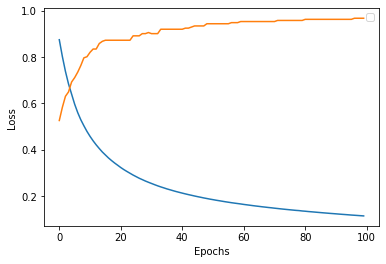

In [63]:
# Plotting Loss And Accuracy
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_df['epoch'], history_df['loss'])
plt.plot(history_df['epoch'], history_df['accuracy'])
plt.legend()
plt.show()